In [1]:
import sys
sys.path.append('../src')
import exlib

In [2]:
import torch
import torchvision
import torch.nn.functional as F
import shap

model = torchvision.models.mobilenet_v2(pretrained=True, progress=False)
model.eval()
X, y = shap.datasets.imagenet50()

X = torch.from_numpy(X).permute(0,3,1,2).float()[0:2]
# y = torch.from_numpy(y).long()[0:2] these labels are garbage

ModuleNotFoundError: No module named 'shap'

In [4]:
from exlib.explainers.torch_explainer import TorchImageLime, TorchImageSHAP
from exlib.explainers.common import patch_segmenter
from exlib.evaluators.attributions import NNZ


eik = {
    "segmentation_fn": patch_segmenter,
    "top_labels": 5, 
    "hide_color": 0, 
    "num_samples": 1000
}
gimk = {
    "positive_only": False
}
explainer = TorchImageLime(model, 
                      explain_instance_kwargs=eik, 
                      get_image_and_mask_kwargs=gimk)
evaluator = NNZ()
expln = explainer(X)
evaluator(X,expln.attributions, normalize=True)

ModuleNotFoundError: No module named 'shap'

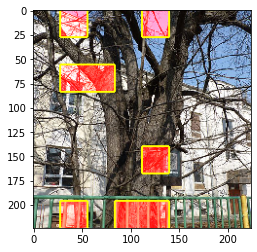

In [4]:
from skimage.segmentation import mark_boundaries
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

explanation = expln.explainer_output[0]

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=8, hide_rest=False)
X_min, X_max = temp.min(), temp.max()
img_boundry1 = mark_boundaries((temp-X_min)/(X_max-X_min), mask)
plt.imshow(img_boundry1, vmin=0, vmax=1, cmap='bwr')

In [5]:
explainer = TorchImageSHAP(model)
expln = explainer(X)
evaluator(X,expln.attributions, normalize=True)

 68%|████████████████████████████████████████████████████████████▊                            | 340/498 [00:00<00:00, 2098.33it/s]
Partition explainer: 3it [00:18,  9.04s/it]                                                                                       


tensor([0.9844, 1.0000])